

# Advanced Analytics for Organisational Impact

# Part 1: Linear regression using Python


## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


### Determine if there are any missing values: 

In [3]:
# Determine whether there are missing values in the turtle_reviews data set.
reviews_na = reviews[reviews.isna().any(axis=1)]

# View the DataFrame shape
reviews_na.shape

(0, 11)

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews.drop(columns=['language', 'platform'], inplace=True)

# View column names.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns

In [7]:
# Rename the column headers.

reviews.rename(columns = {'remuneration (k£)':'remuneration'}, inplace = True)
reviews.rename(columns = {'spending_score (1-100)':'spending_score'}, inplace = True)

# View column names.
reviews

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv')

In [9]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View the DataFrame.
reviews

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [10]:
# Determine whether there are missing values in the turtle_reviews data set.
reviews_na = reviews[reviews.isna().any(axis=1)]

# View the DataFrame shape
reviews_na.shape

(0, 10)

In [11]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [12]:
# Descriptive statistics.
reviews.describe()

,Unnamed: 0,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,577.494589,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,0.000000,17.000000,12.300000,1.000000,25.000000,107.000000
25%,499.750000,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,999.500000,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,1499.250000,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,1999.000000,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 5. Linear regression

In [13]:
# Import the necessary libraries.
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols

### 5a) spending vs loyalty

Text(0, 0.5, 'Loyalty Points')

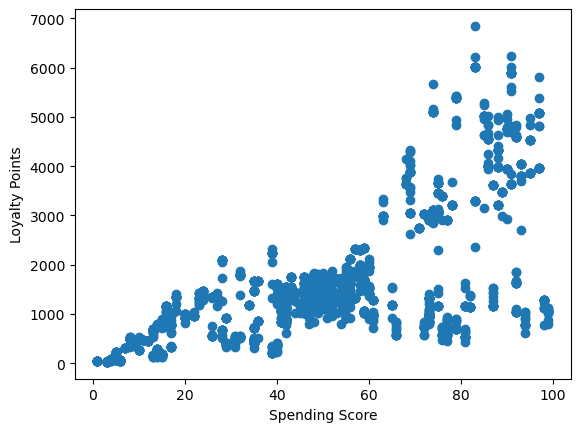

In [14]:
# Define the dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = reviews['spending_score'].values.reshape(-1, 1)

# Check for linearity with Matplotlib.
plt.scatter(x, y)

plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

There seems to be a string postivice correlation to 60 spending score and 2000 loyalty points.I want to explore the data filtered up to a score of 60 as after 60 spending score, the positive correlation is weak.

In [15]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.92e-263
Time:                        08:44:37   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
- R-squared = 0.452, showing this not a good model as only 45% of the observed variation can be explained by the model's inputs.
- Prob (F-statistic) (p-value): the p-value is and 2.92e-263. It is than 0.05, there it is significant.
- T-value: the probability of the t-value is zero (P>|t|), thus the estimated slope is significant.

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [17]:
# Set the the coefficient to 33.06169 and the constant to -75.052663.
y_pred = (-75.052663) + 33.061693 * reviews['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

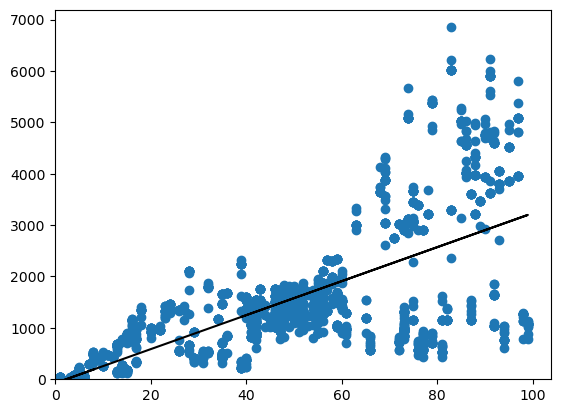

In [18]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

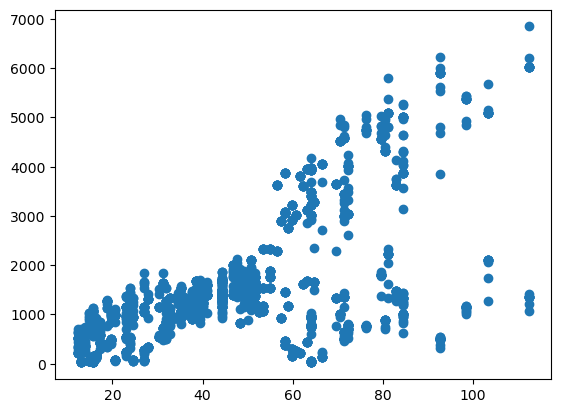

In [19]:
# Define the dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = reviews['remuneration'].values.reshape(-1, 1)

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [20]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.43e-209
Time:                        08:44:38   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
- R-squared = 0.380, showing this not a good model as only 38% of the observed variation can be explained by the model's inputs.
- Prob (F-statistic) (p-value): the p-value is and 2.43e-209. It is than 0.05, therefore it is significant.
- T-value: the probability of the t-value is zero (P>|t|), thus the estimated slope is significant.

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [22]:
# Create the linear regression model.
# Set the the coefficient to 34.187825 and the constant to -65.686513.
y_pred = (-65.686513) + 34.187825 * reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

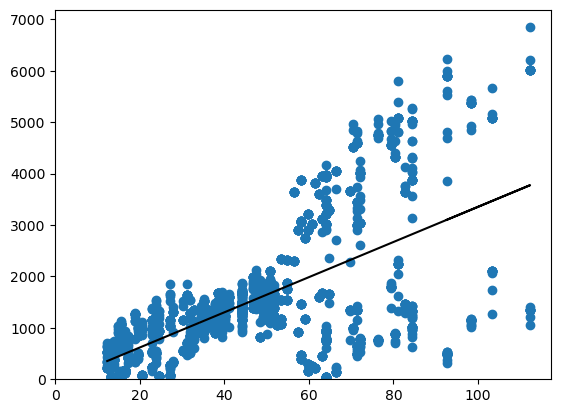

In [23]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

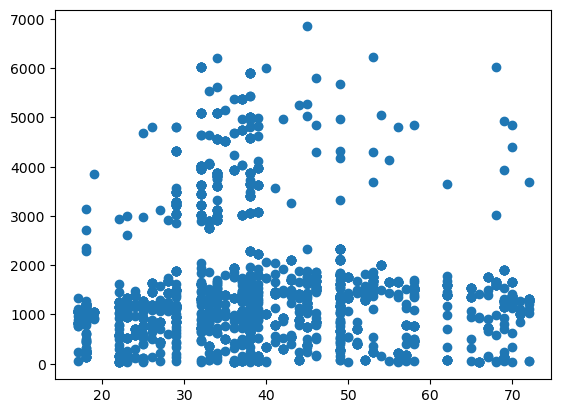

In [24]:
# Define the dependent variable.
y = reviews['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = reviews['age'].values.reshape(-1, 1)

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [25]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 02 May 2023   Prob (F-statistic):             0.0577
Time:                        08:44:39   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations:
- R-squared = 0.002, showing this not a good model as only 0.2% of the observed variation can be explained by the model's inputs.
- Prob (F-statistic) (p-value): the p-value is and 0.0577. It is greater than 0.05, there it is not significant.
- T-value: the probability of the t-value is 0.058. It is greater than zero (P>|t|), thus the estimated slope is not significant

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [27]:
# Create the linear regression model.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (1736.517739) +  -4.012805 * reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

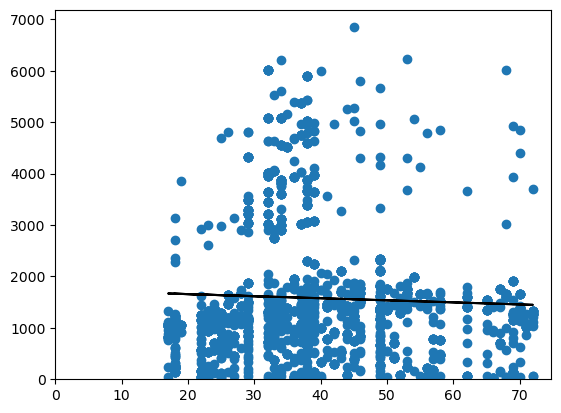

In [28]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### Multiple linear regression

In [29]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [30]:
# Define the dependent variable.
y = reviews['loyalty_points']  

# Define the independent variable.
X = reviews[['spending_score', 'remuneration']] 

In [31]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [32]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [33]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.8269134701989259
Intercept:  -1700.3050970144357
Coefficients:


[('spending_score', 32.89269468782097), ('remuneration', 33.97949882180282)]

In [34]:
# Create a variable 'New_spending_score' and define it as 80
New_spending_score = 80

# Create 'New_age' and define it as 30
New_age = 30 

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[New_spending_score ,New_age]]))  

Predicted Value: 
 [1950.49544267]


In [35]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [36]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3665.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        08:44:40   Log-Likelihood:                -12292.
No. Observations:                1600   AIC:                         2.459e+04
Df Residuals:                    1597   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3810     40.400    -42.

In [37]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [38]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 1218.46660121   618.29301891  2312.04851244 ...  1452.7136095
 -1006.77936277  1203.19986663]


In [39]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.43311406e+03  3.38498142e+03  1.68174774e+03  1.59972741e+03
  1.05209014e+03  1.17026310e+03  3.41036952e+03  1.05209014e+03
  3.25925979e+03  2.23910009e+03 -2.03602914e+02  4.81806858e+02
  1.25121581e+02  1.20319987e+03  1.26907340e+03  1.41158500e+03
  1.19739315e+02  1.56679064e+03  3.16711810e+03  2.23910009e+03
  1.66560094e+03  2.08389444e+03  1.45271361e+03 -6.55239460e+02
  4.41052339e+03  2.99705200e+03  3.41317910e+03  1.56550430e+03
 -7.15730728e+02  1.57819835e+03  1.44645128e+03  4.20816370e+03
  1.32804143e+03  3.89839558e+03  1.23677981e+03  1.99022952e+03
 -1.11461224e+02  6.96217428e+02  2.16117568e+03  8.16556791e+02
  1.73749992e+03  9.49827093e+02  1.03313377e+03  1.56679064e+03
 -8.46834623e+02  1.50027394e+03  1.21332123e+03  1.67162638e+03
 -1.06188836e+03  1.61651738e+03  1.53063802e+03 -1.07803516e+03
  3.01793790e+03  1.60703919e+03 -2.52956378e+00  1.59908424e+03
  1.41287134e+03  1.21846660e+03  1.40877542e+03  3.93735779e+03


In [40]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

84.27307474340161


as the MLR R-squared value is 84, this shows a high level of correlation and we can use this model to accurately predict how the remuneration and spending score will affect loyalty points

### Testing for multicoliniarity

In [41]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        9.45           const
1        1.00  spending_score
2        1.00    remuneration


As both of the values have a VIF Factor of 1, we can keep them as they will not affect the accuracy and stability of the regression model.

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=One%20method%20to%20detect%20multicollinearity,greater%20than%201.5%20indicates%20multicollinearity.

## Improving the accuracy of the regression model by subsetting the data

In [42]:
# Filter the data set to only look at data from 2021-08 onwards.
reviews_filter = reviews[reviews['spending_score'] < 61]

reviews_filter.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
6,6,Female,37,14.76,6,61,diploma,979,"I have bought many gm screens over the years, ...",Best gm screen ever
8,8,Male,66,15.58,3,31,PhD,1031,Could be better but its still great. I love th...,Great but could be even better


Text(0, 0.5, 'Loyalty Points')

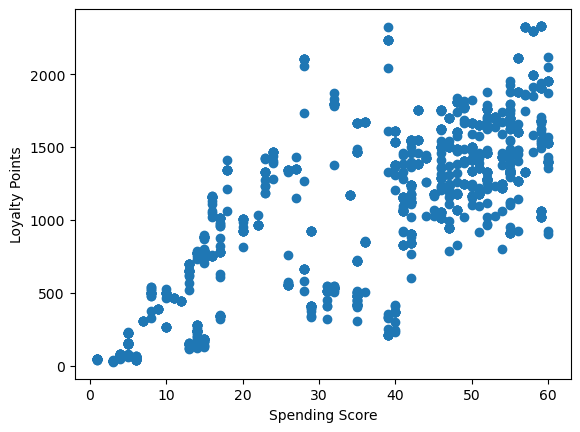

In [43]:
# Define the dependent variable.
y = reviews_filter['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = reviews_filter['spending_score'].values.reshape(-1, 1)

# Check for linearity with Matplotlib.
plt.scatter(x, y)

plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

In [44]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_filter).fit()

# Print the regression table.
test.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2055.
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.74e-274
Time:                        08:44:41   Log-Likelihood:                -10015.
No. Observations:                1367   AIC:                         2.003e+04
Df Residuals:                    1365   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.8290     22.483      7.020      0.000     113.725     201.933
x             25.5150      0.563     45.327      0.000      24.411      26.619
==============================================================================
Omnibus:                       29.904   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.134
Skew:                           0.335   Prob(JB):                     1.05e-07
Kurtosis:                       3.340   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    157.829011
x             25.514988
dtype: float64
Standard errors:  Intercept    22.482734
x             0.562911
dtype: float64
Predicted values:  [1152.91355845  310.91894147 1178.42854685 ...  361.94891825  566.0688254
  361.94891825]


In [46]:
# Create the linear regression model.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (157.829011) +  25.514988 * reviews_filter['spending_score']

# View the output.
y_pred

0       1152.913543
2        310.918939
4       1178.428531
6        310.918939
8        234.373975
           ...     
1992     591.583807
1994     744.673735
1996     361.948915
1998     566.068819
1999     361.948915
Name: spending_score, Length: 1367, dtype: float64

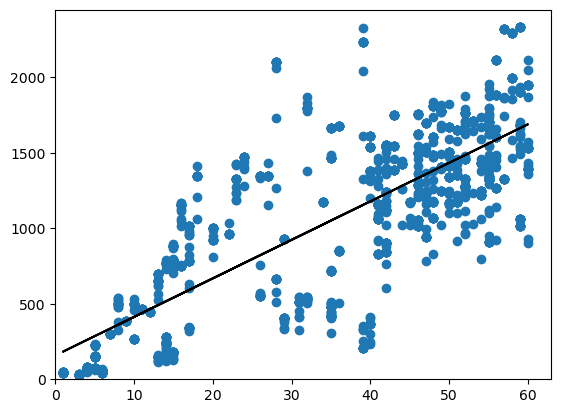

In [47]:
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

By removing spending scores above 60, the R-Squared has increased from 45 before filtering the data. This is still not a fantastic correlation but it is more possible and it us to us to decide if we can predict with a 60% confidence if that is acceptable

## 6. Observations and Insights

I do not think any of these models are a good test for predicatability. There seems to be correlation up to around 2000 loyalty points for each graph, after which there is no way to accurately predict what the loyalty points will be based on spending score, salary or age. Going forward I would suggest gathering data such as gender or frequency of purchase as predictors for loyalty points.

By taking a portion of the data, we are able to make more accurate predictions, increasing the confidence by 10-15%

We can however use the data to do a multiple linear regression to predict loyalty points using remunerationa and spending score

# 

# Part 2: Clustering with *k*-means using Python

## 1. Load and explore the data

In [48]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load the CSV file(s) as df2.
reviews2 = reviews
# View DataFrame.
reviews2

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [50]:
# Drop unnecessary columns.
reviews2 = reviews2[['remuneration', 'spending_score']]

# View DataFrame.
reviews2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [51]:
# Explore the data.
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [52]:
# Descriptive statistics.
reviews2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

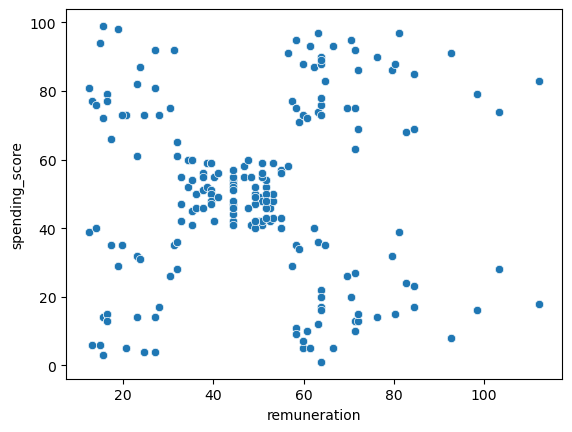

In [53]:
# Create a scatterplot with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=reviews2)

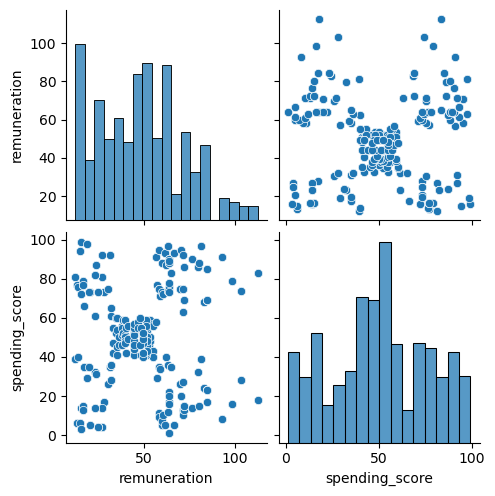

In [54]:
# Create a pairplot with Seaborn.
# Create a pairplot with Seaborn.
x = reviews2[['remuneration', 'spending_score']]

sns.pairplot(reviews2,
             vars=x)

## 3. Elbow and silhoutte methods

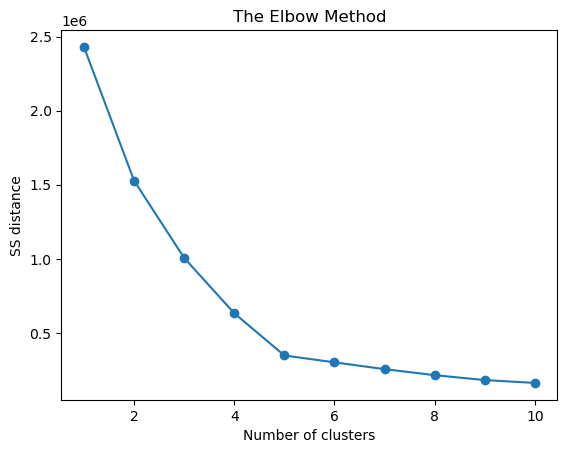

In [55]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

Based on the elbow method, we should look at 5 clusters

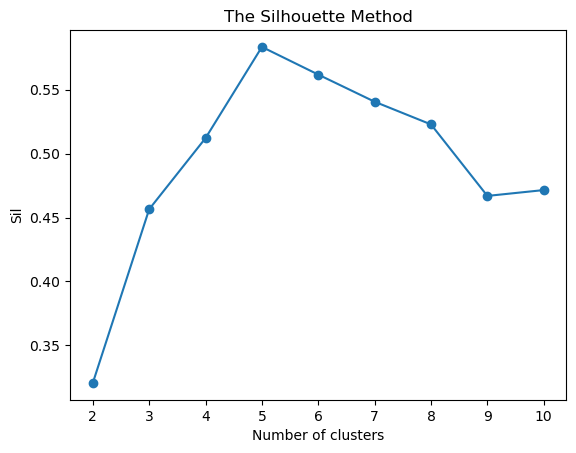

In [56]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Based on the silhouette methos, we should  use 5 clusters.

I will now test clusters of 4,5 and 6 to determine which is the correct amount of clusters

## 4. Evaluate k-means model at different values of *k*

In [57]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

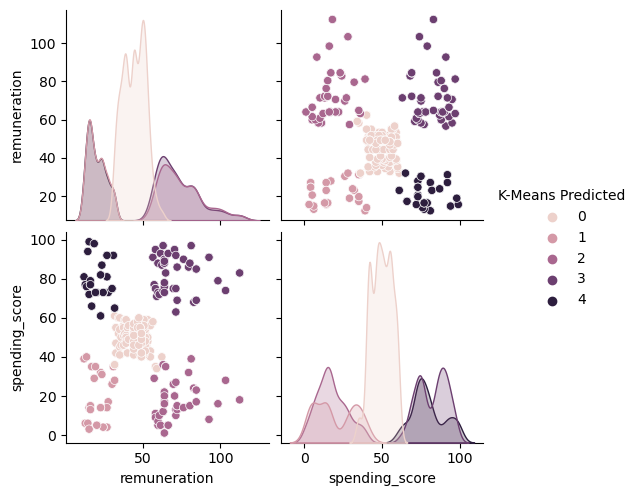

In [58]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

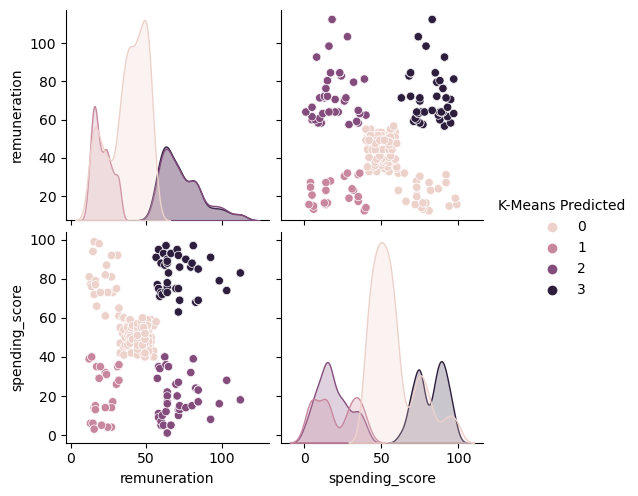

In [59]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

With 4 clusters, the light pink cluster is larger than the other 4 clusters. It is too big of an area to be agood predicitve cluster

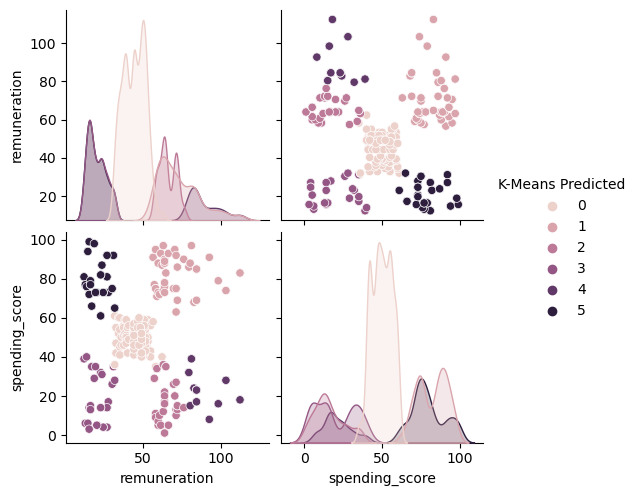

In [60]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

The 6th customer is too small to be its own cluster and would fit with the cluster labelled at 3, therefore this is too many clusters

## 5. Fit final model and justify your choice

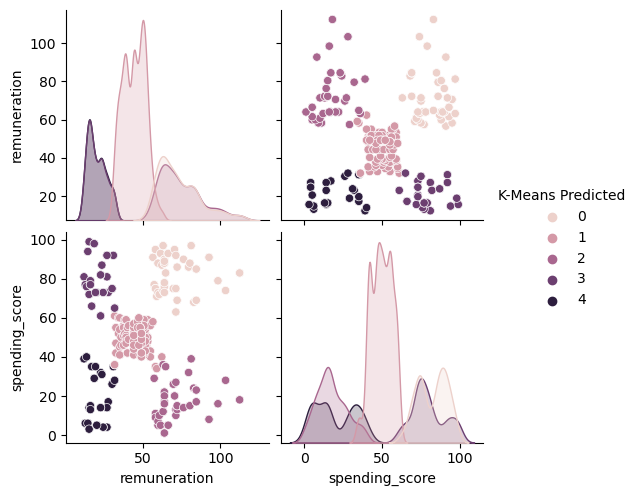

In [61]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

There are 5 clear groups when looking at the scatter plots, that is why I have chosen 5 clusters

In [62]:
# Check the number of observations per predicted class.
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

Besides the first cluster, the rest of the clusters are close is size

In [63]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

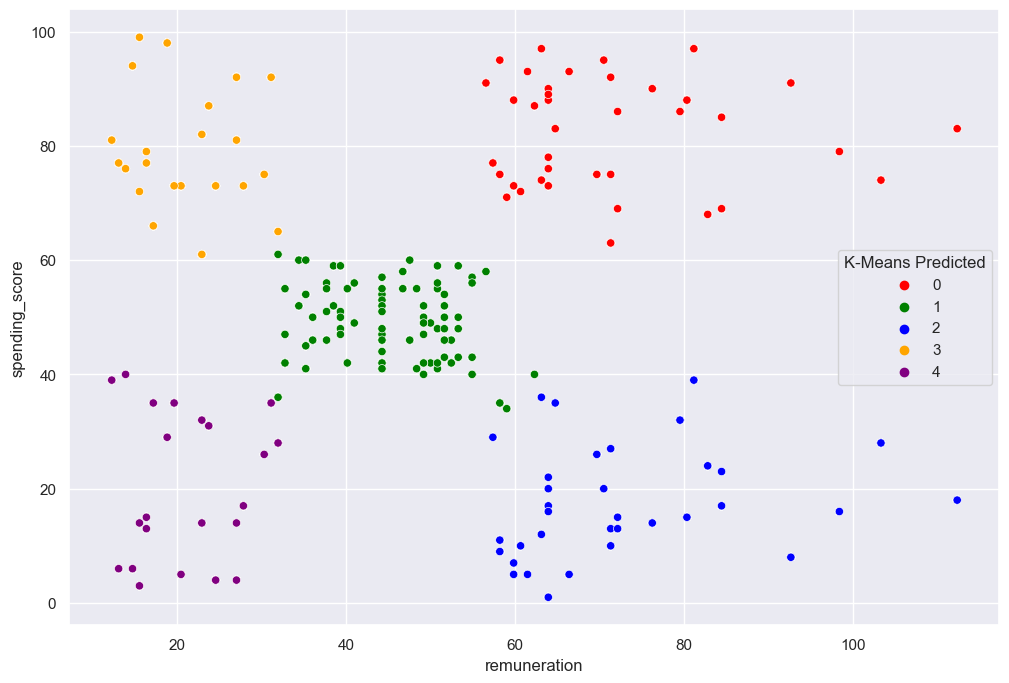

In [64]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','orange','purple'])

## 7. Discuss: Insights and observations

***Your observations here...***

We have identified 5 groups within a given data set based on their similarity. By grouping our customers into these groups, we can better predict what their spending scores will be based on their remuneration. We can then decide which demographic of customers we should focus our marketing efforts towards. The next observation would be to look at what products these groups buy most of. We can see there are two groups that have a high spending score but have very different remuneration. the first is 0-40 and the second is 60- 110. If we can see a trend in the products these groups buy, we can maybe run different marketing campaigns with promotions od certain products that are most attractive to each group

# 

# Part 3: NLP using Python

## 1. Load and explore the data

In [65]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [66]:
# Load the data set as df3.
reviews3 = reviews

# View DataFrame.
reviews3

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [67]:
# Explore data set.
reviews3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [68]:
# Keep necessary columns. Drop unnecessary columns.
reviews3 = reviews3[['review', 'summary']]


# View DataFrame.
reviews3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [69]:
# Determine if there are any missing values.
# Determine whether there are missing values in the turtle_reviews data set.
reviews3_na = reviews3[reviews3.isna().any(axis=1)]

# View the DataFrame shape
reviews3_na.shape

(0, 2)

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [70]:
# Review: Change all to lower case and join with a space.
reviews3['review'] = reviews3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Summary: Change all to lower case and join with a space.

reviews3['summary'] = reviews3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [71]:
# Replace all the punctuations in review column.
reviews3['review'] = reviews3['review'].str.replace('[^\w\s]','')

# Preview the result.
reviews3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [72]:
# Replace all the puncuations in summary column.
reviews3['summary'] = reviews3['summary'].str.replace('[^\w\s]','')

# Preview the result.
reviews3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [73]:
# Drop duplicates in both columns.
reviews4 = reviews3.drop_duplicates(subset=['review','summary'])
reviews4.reset_index(inplace=True)

# View DataFrame.
reviews4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


### Creating a review wordcloud

In [74]:
#create a Review Wordcloud
# String all the comments together in a single variable.
# Create an empty string variable.
all_review = ''
for i in range(reviews4.shape[0]):
    # Add each comment.
    all_review = all_review + reviews4['review'][i]

In [75]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [76]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review) 

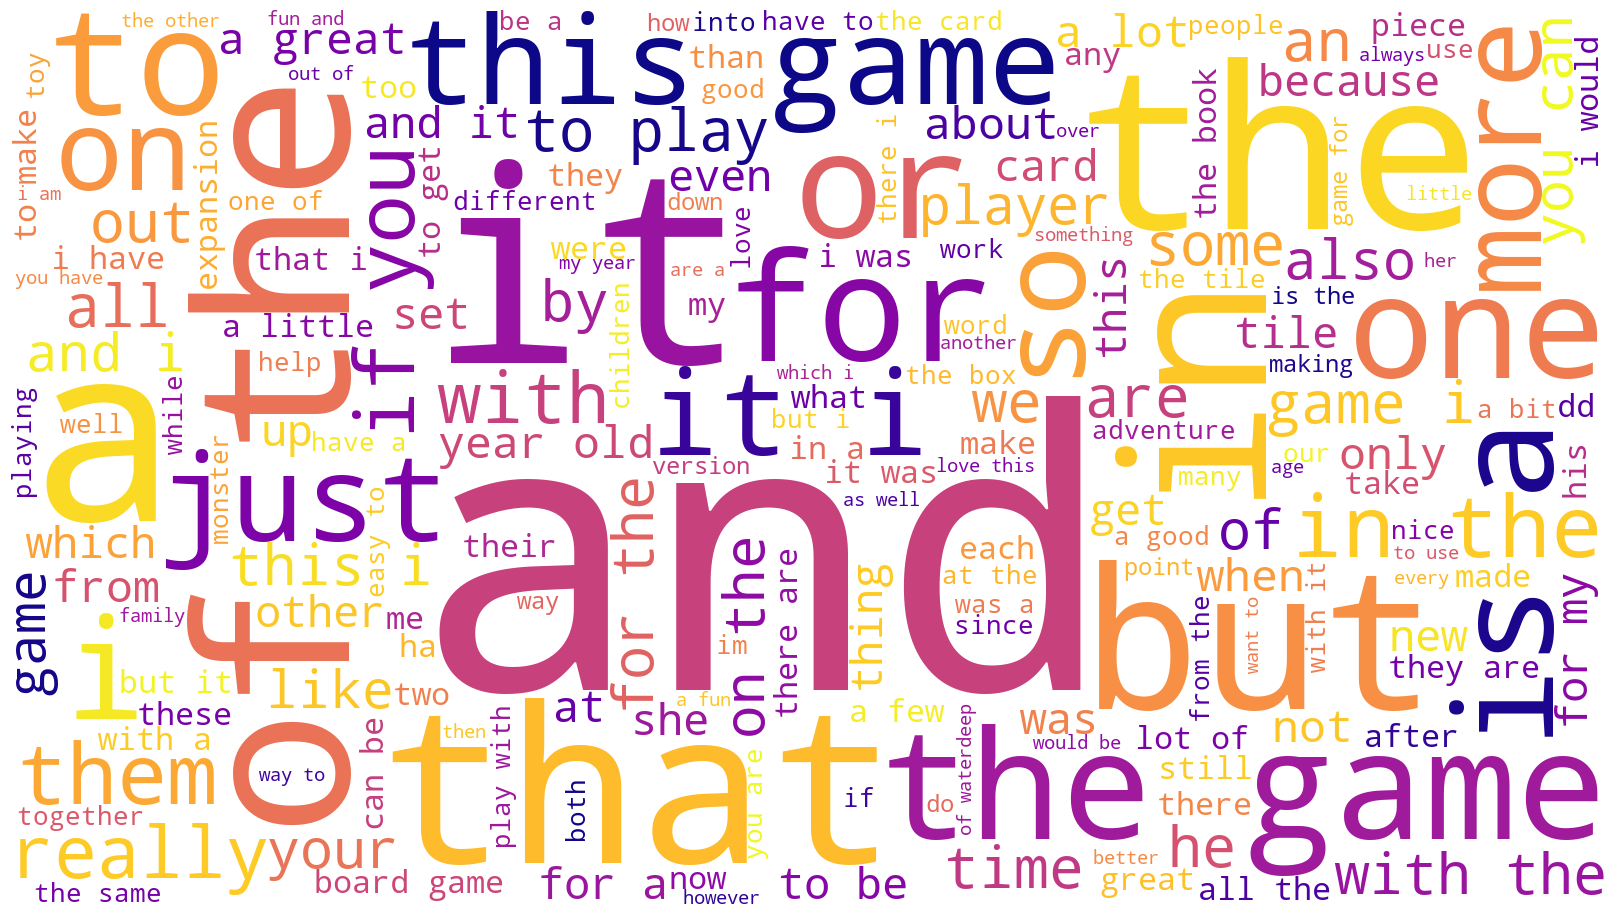

In [77]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

This word cloud has a lot of stopwords in it, we need to remove them to get a better idea of what customers are saying in reviews. So far we can see the word game is mentioned often which makes sense as most people would be reviewing games. 

### Creating a summary wordcloud

In [78]:
#create a Summary Wordcloud
# String all the comments together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(reviews4.shape[0]):
    # Add each comment.
    all_summary = all_review + reviews4['summary'][i]

In [79]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summary) 

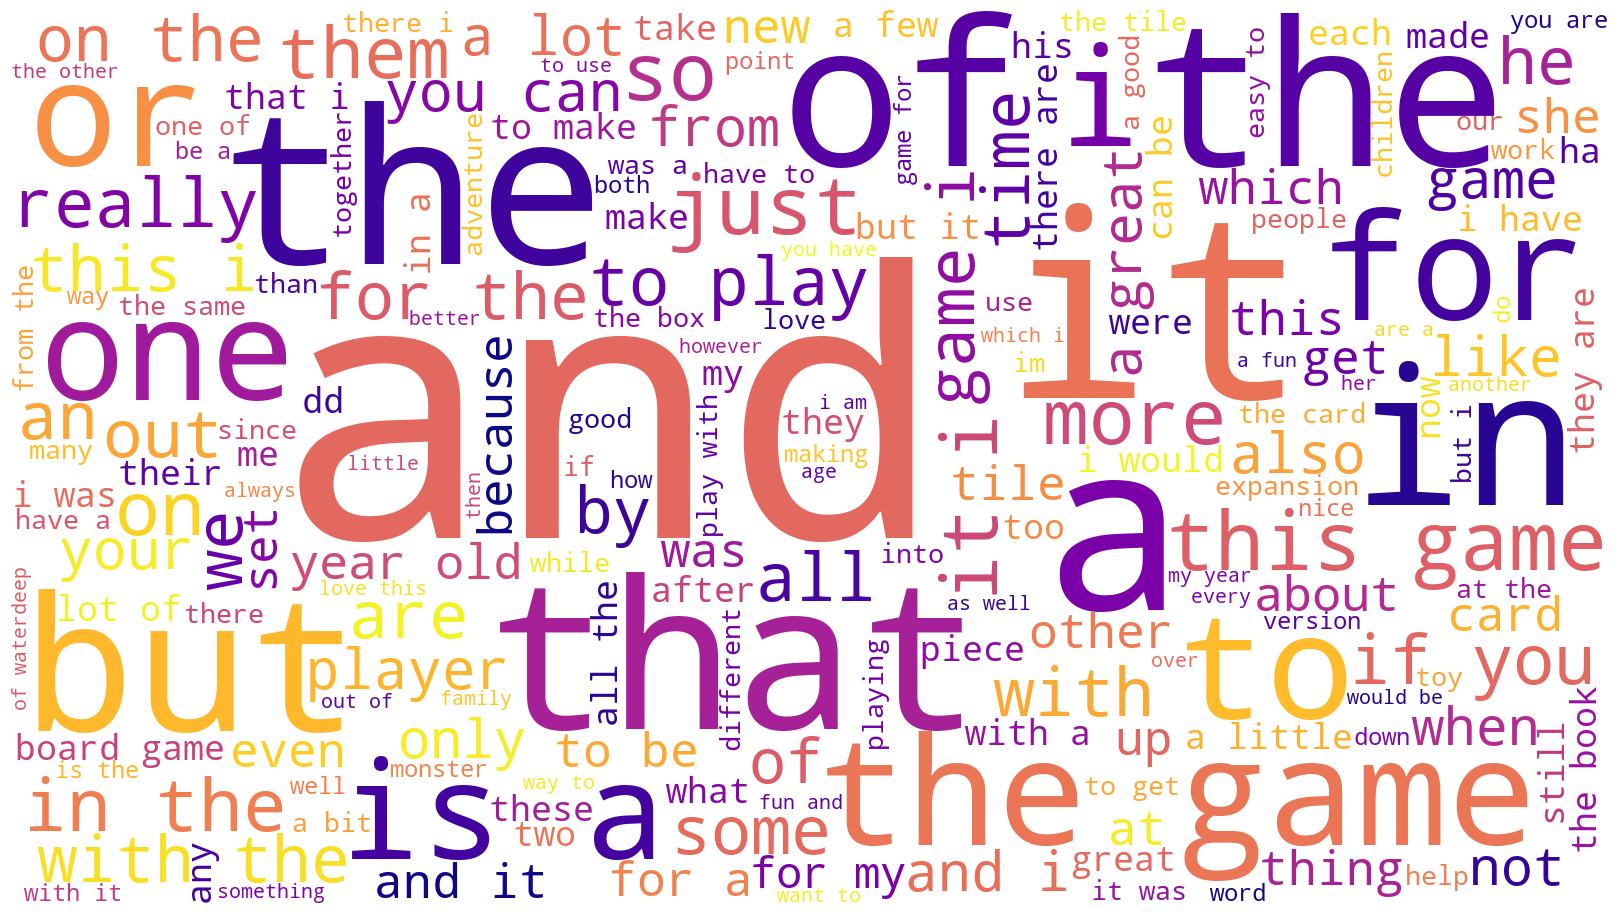

In [80]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

As there are too many stopwords, I will remove them using tokenization

## 3. Tokenise both columns and create a wordcloud

In [81]:
# Create new DataFrame (copy DataFrame).
reviews5 = reviews4

# View DataFrame.
reviews5

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [82]:
# Import nltk and download nltk's resources to assist with tokenisation
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /Users/jess/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Applying tokenisation to both columns.

In [83]:
# Tokenise the words for Review.
reviews5['tokens'] = reviews5['review'].apply(word_tokenize)

# View DataFrame.
reviews5['tokens'].head()


0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [84]:
# Define an empty list of tokens.
all_tokens = []

for i in range(reviews5.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + reviews5['tokens'][i]

In [85]:
# Tokenise the words for Summary.
reviews5['tokens2'] = reviews5['summary'].apply(word_tokenize)

# View DataFrame.
reviews5['tokens2'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens2, dtype: object

### Creating a list combining summary and review columns

In [86]:
# Define an empty list of tokens.
all_tokens = []

for i in range(reviews5.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + reviews5['tokens2'][i] + reviews5['tokens'][i]
    
all_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'an',
 'open',
 'letter',
 

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [87]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'the': 5712, 'and': 3401, 'a': 3400, 'to': 3354, 'of': 2627, 'it': 2233, 'i': 2176, 'game': 1990, 'this': 1911, 'is': 1885, ...})

### 4b) Remove alphanumeric characters and stopwords

In [88]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens = [word for word in all_tokens if word.isalnum()]

In [89]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens3 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens3_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens3_string = tokens3_string + value + ' '

[nltk_data] Downloading package stopwords to /Users/jess/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [90]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens3_string)


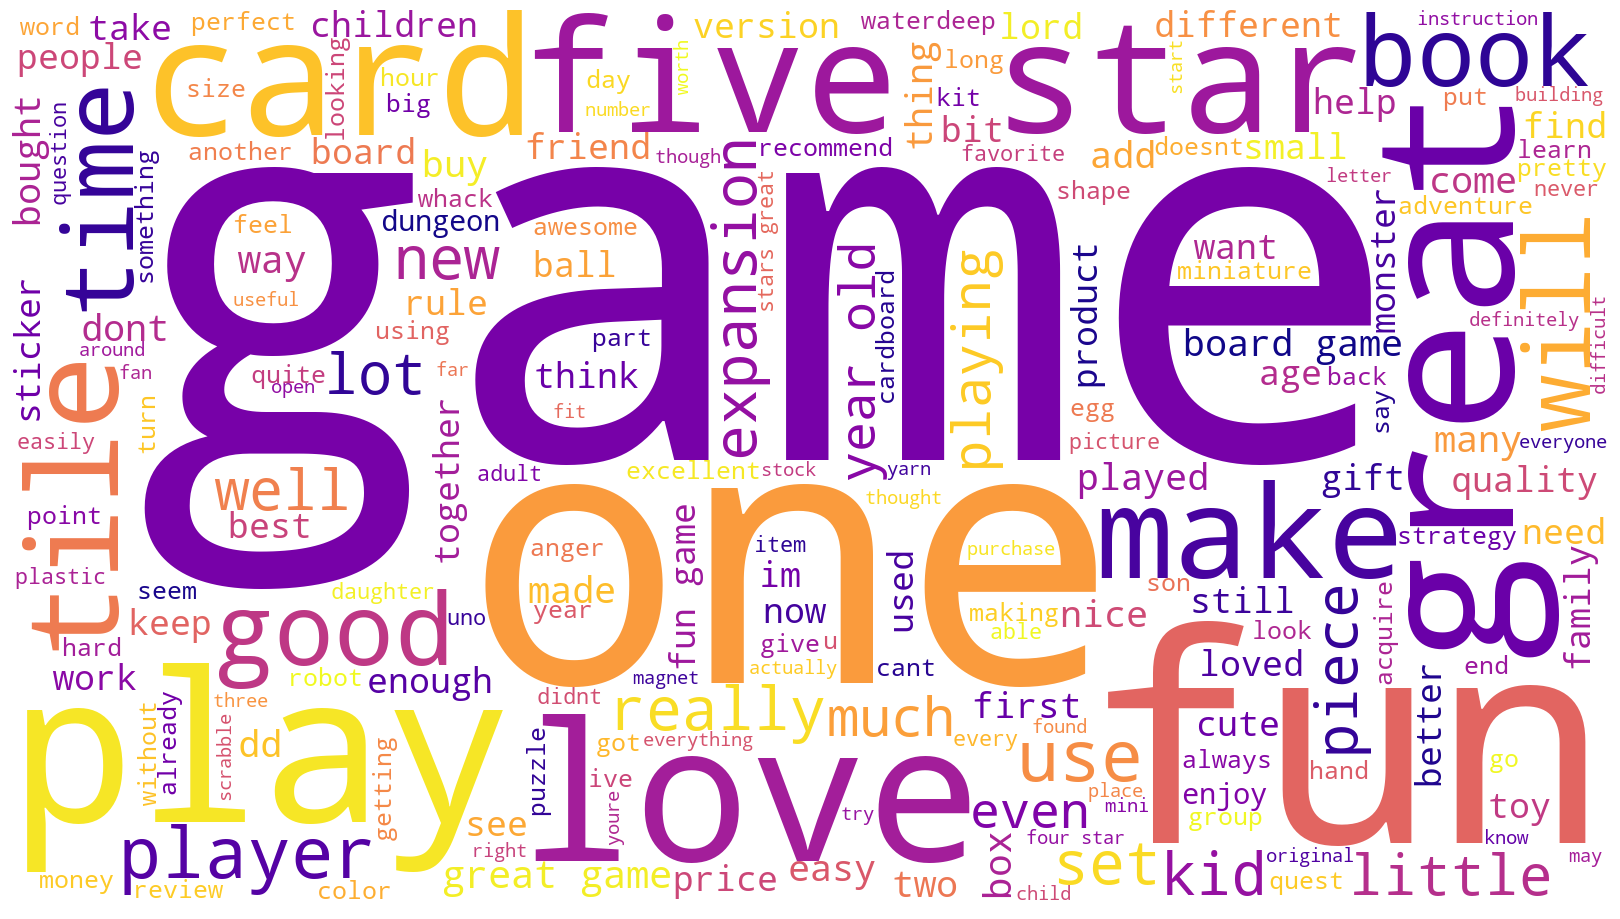

In [91]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

We see many positive words in the wordcloud which shows reviewers are mostly positive. The biggest word is Game - which makes sense - but after that we see positive words like "fun", "five star", "great" and "love". This gives a great overview of the content of the reviews and now we can further analyse them by doing a sentiment analysis.

### 4d) Identify 15 most common words and polarity

In [92]:
# Determine the 15 most common words.
# View the frequency distribution.
fdist1 = FreqDist(tokens3)

# Preview the data.
fdist1

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

In [93]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens3).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1990
great,875
fun,770
one,568
play,528
like,468
stars,464
love,416
good,381


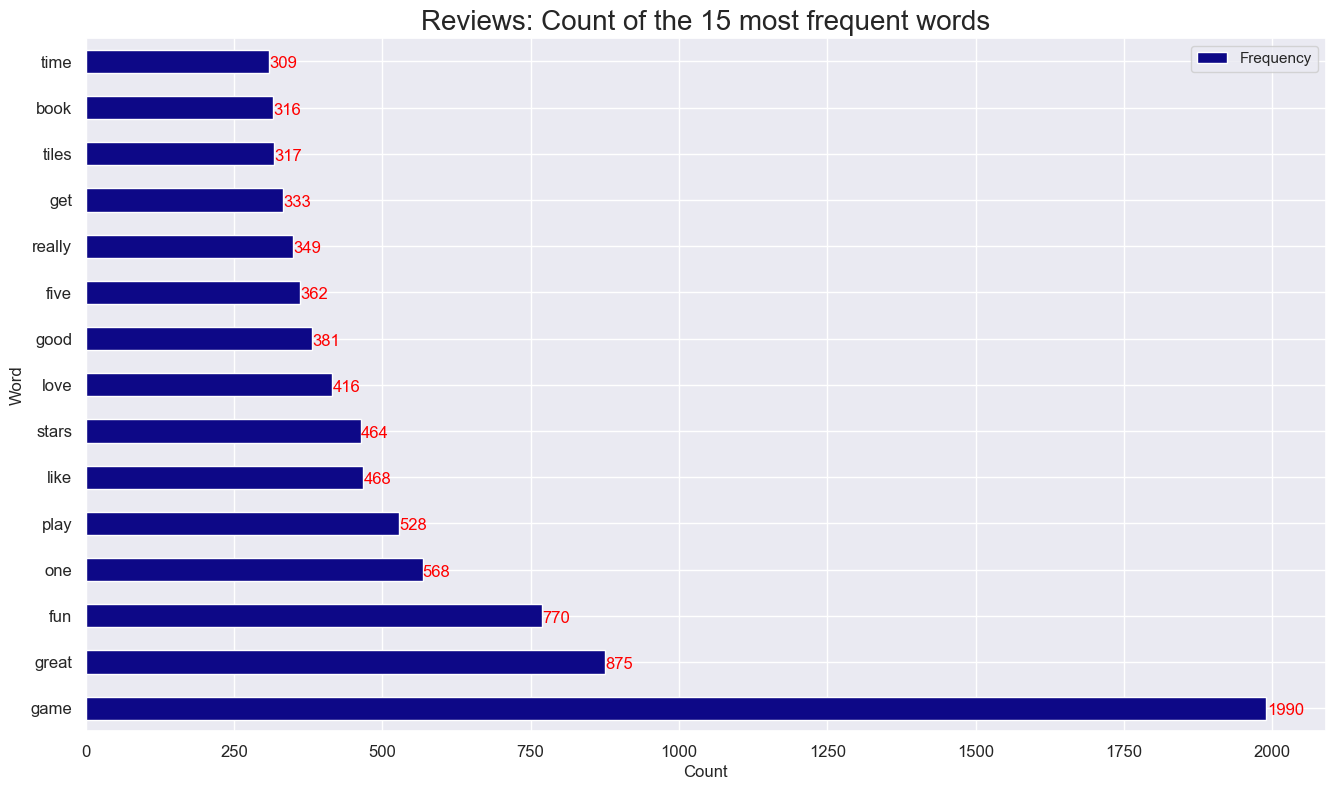

In [94]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

We see words like great, good, love, like, five (I am assuming referencing 5 stars). These words all show a positive sentiment. However I also see the word one - this could be in reference to number 1 or 1 star so it might be interesting to look at those reviews more closely to see if one is positive or negative.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [95]:
# Install TextBlob.
!pip install textblob

# Import the necessary package 
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [96]:
# Determine polarity of both columns. 
reviews4['polarityreview'] = reviews4['review'].apply(generate_polarity)
reviews4['polaritysummary'] = reviews4['summary'].apply(generate_polarity)

# View output.
reviews4

,index,review,summary,tokens,tokens2,polarityreview,polaritysummary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000
1957,1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667
1958,1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000
1959,1998,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000


In [97]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
reviews4['subjectivityreview'] = reviews4['review'].apply(generate_subjectivity)
reviews4['subjectivitysummary'] = reviews4['summary'].apply(generate_subjectivity)
# Preview the result.
reviews4.head()

,index,review,summary,tokens,tokens2,polarityreview,polaritysummary,subjectivityreview,subjectivitysummary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15,0.486111,0.500000
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80,0.442976,0.900000
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00,0.430435,0.733333
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00,0.784848,0.000000
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00,0.316667,0.000000


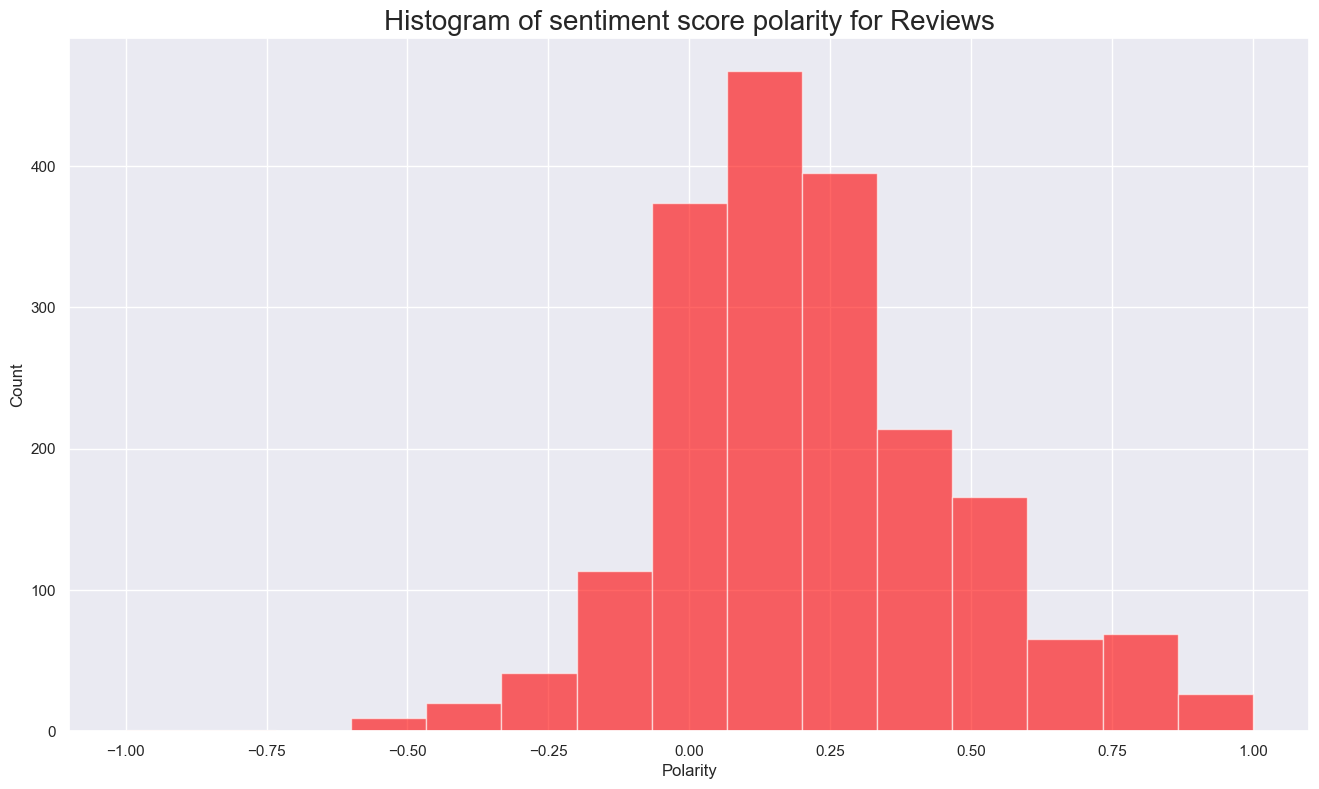

In [98]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews4['polarityreview'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Reviews', fontsize=20)

plt.show()

# Histogram of sentiment score


Overall the score is leaning neutral to positive, there are few negative scores

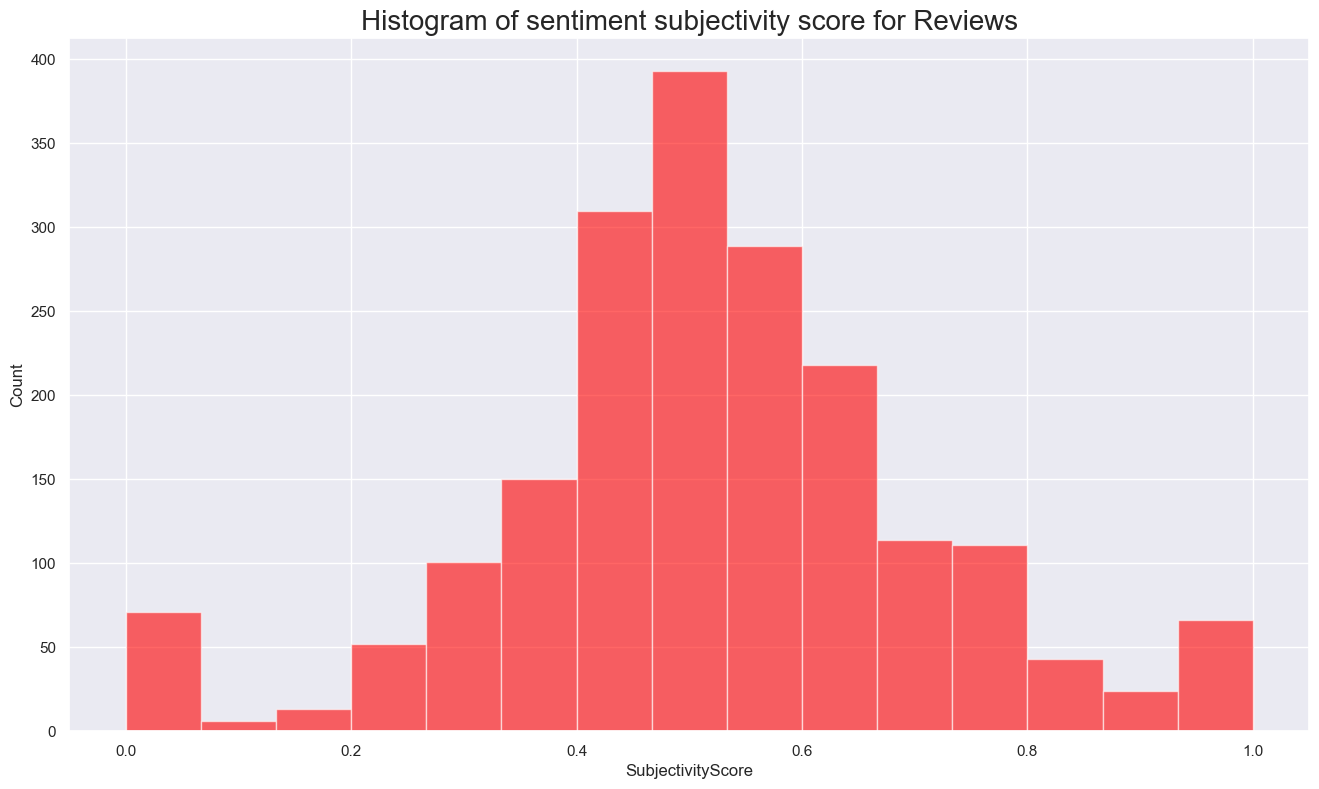

In [99]:
# Review: Create a histogram plot with bins = 15.
# Histogram of subjectivity score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews4['subjectivityreview'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('SubjectivityScore', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment subjectivity score for Reviews', fontsize=20)

plt.show()


The subjectivity mostly falls around 0.5 this shows that the reviews are have an equal mix of subjectivity and objectivity. I feel for reviews this is standard as people tend to get emotional when they are creating reviews and do not stay objective about purchases.

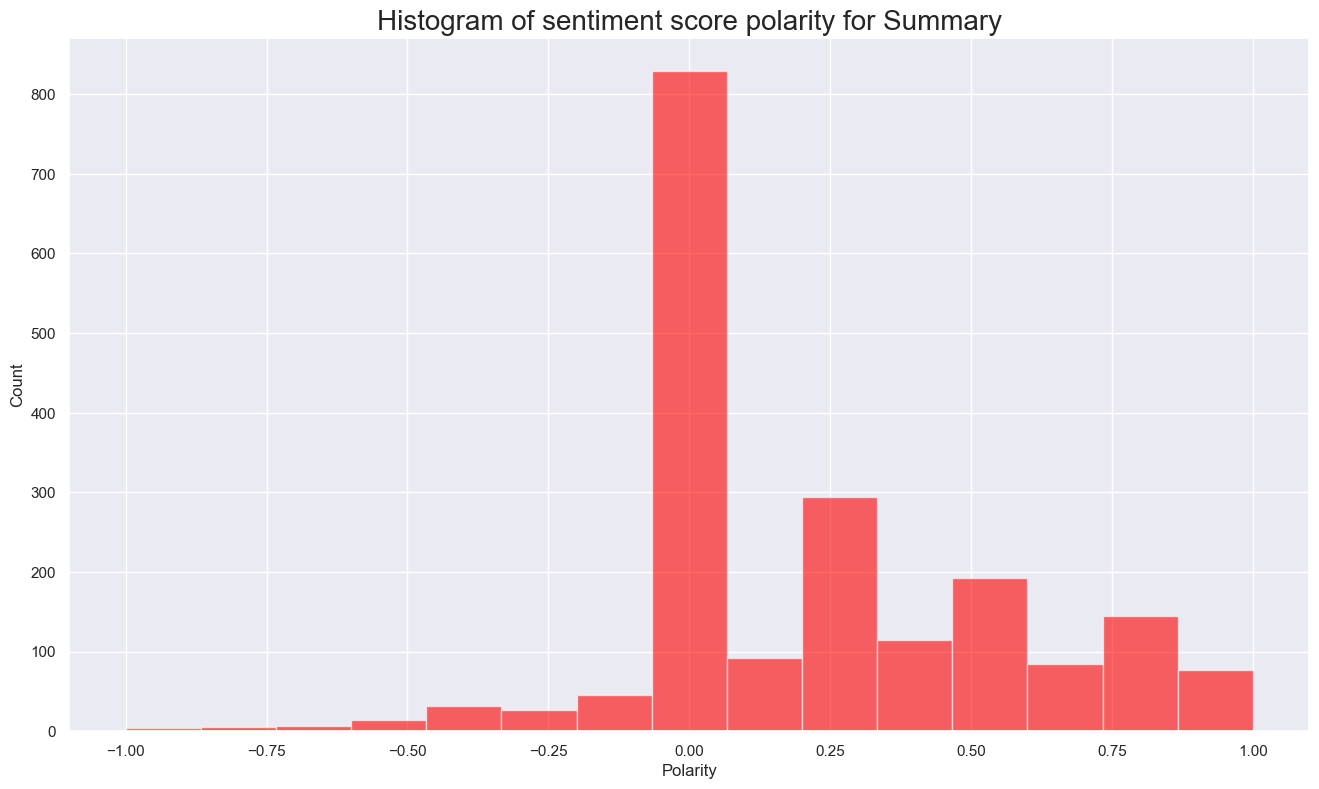

In [100]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews4['polaritysummary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summary', fontsize=20)

plt.show()


the polarity is ovrerall neutral to positive, there is very little negative sentiment in the reviews

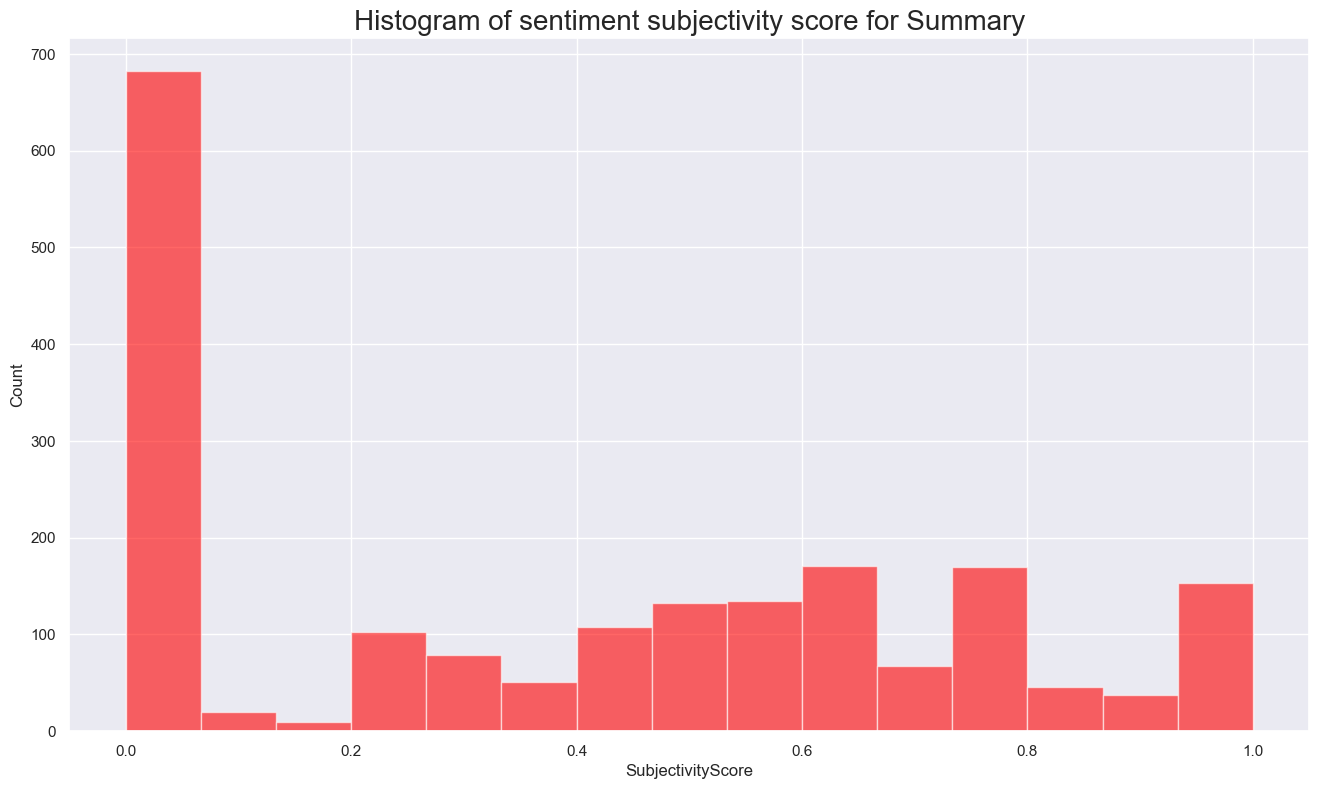

In [101]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of subjectivity score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews4['subjectivitysummary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('SubjectivityScore', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment subjectivity score for Summary', fontsize=20)

plt.show()

This shows the summary data is very objective, we should use this to get a real reflection of the sentiment of the customers

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [102]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = reviews4.nsmallest(20, 'polarityreview')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'polarityreview', 'subjectivityreview']]


# Adjust the column width.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '600px'})

,review,polarityreview,subjectivityreview
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000,1.000000
181,incomplete kit very disappointing,-0.780000,0.910000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333,0.750000
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000,0.300000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000,0.900000
226,this was a gift for my daughter i found it difficult to use,-0.500000,1.000000
229,i found the directions difficult,-0.500000,1.000000
289,instructions are complicated to follow,-0.500000,1.000000
300,difficult,-0.500000,1.000000
1501,expensive for what you get,-0.500000,0.700000


Looking at the reviews we can see that the reviews in the bottom 20 already start leaning positive after the first 15 reviews. As there are few negative reviews, I would suggest reaching out to the customers to get more information and see if it is possible to make their problems better.

In [103]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment_summary = reviews4.nsmallest(20, 'polaritysummary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polaritysummary', 'subjectivitysummary']]


# Adjust the column width.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '600px'})

,summary,polaritysummary,subjectivitysummary
21,the worst value ive ever seen,-1.000000,1.000000
207,boring unless you are a craft person which i am,-1.000000,1.000000
819,boring,-1.000000,1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000,0.700000
1,another worthless dungeon masters screen from galeforce9,-0.800000,0.900000
143,disappointed,-0.750000,0.750000
623,disappointed,-0.750000,0.750000
785,disappointed,-0.750000,0.750000
1591,disappointed,-0.750000,0.750000
361,promotes anger instead of teaching calming methods,-0.700000,0.200000


I see the word dissapointed and dissapointing multiple times. I think it would be interesting to look at the reviews of these summaries to see why they are dissapointing. 

In [104]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = reviews4.nlargest(20, 'polarityreview')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'polarityreview', 'subjectivityreview']]


# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '600px'})

,review,polarityreview,subjectivityreview
7,came in perfect condition,1.000000,1.000000
164,awesome book,1.000000,1.000000
193,awesome gift,1.000000,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000,1.000000
517,perfect just what i ordered,1.000000,1.000000
583,wonderful product,1.000000,1.000000
601,delightful product,1.000000,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000,1.000000
782,perfect,1.000000,1.000000
923,awesome,1.000000,1.000000


It is interesting to look at the reviews that lean towards objective - we can use these reviews as accuarate predictions of what products will sell and what type of products will sell.

In [105]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment = reviews4.nlargest(20, 'polaritysummary')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'polaritysummary', 'subjectivitysummary']]


# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '600px'})



,summary,polaritysummary,subjectivitysummary
6,best gm screen ever,1.000000,0.300000
28,wonderful designs,1.000000,1.000000
32,perfect,1.000000,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000,1.000000
133,perfect for preschooler,1.000000,1.000000
139,awesome sticker activity for the price,1.000000,1.000000
160,awesome book,1.000000,1.000000
162,he was very happy with his gift,1.000000,1.000000
186,awesome,1.000000,1.000000
209,awesome and welldesigned for 9 year olds,1.000000,1.000000


There is a high subjectivity score in these positive summaries - because of this we should read more into the full reviews. eg: perfect for a preschooler could indicate the product is easy and it may have been marketed to an older person and the reviewer was being ironic. Anorher interesting one is number 20 - the test is picking up "best quality" and is categorising the summary as good but it is actually not a postivie summary.

##  Insights and observations

We need to look at products that have postivive reviews  that are also objective. That way we can predict which products will sell. Online reviews are important factors that influence sales. We also need to look at if negative reviews impact sales of products and if we should carry less products with negative reviews because they may not move as much

# 